# Part II: Road Lane Detection Using Hough Transform

## 2.1 Hough Transform

In [5]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage.draw import polygon2mask
from google.colab.patches import cv2_imshow

In [6]:
def show_image(img, x_axes_visible = False, y_axes_visible = False):
  ax = None
  if len(img.shape) == 3:
    ax = plt.imshow(img[:,:,::-1])
  else:
    ax = plt.imshow(img, cmap='gray', vmin=0, vmax=255)

  ax.axes.get_xaxis().set_visible(x_axes_visible)
  ax.axes.get_yaxis().set_visible(y_axes_visible)
  plt.show()


In [7]:
road_img_path = 'testHough.jpg'
img = cv2.imread(road_img_path)

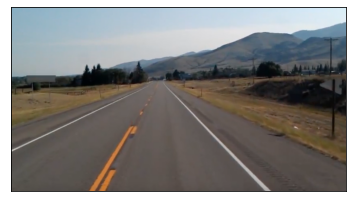

In [8]:
show_image(img)

## 2.2 Implementation Details

### 2.2.1 Smoothing the image

In [9]:
KERNEL_LENGTH = 7
bruled_img = cv2.medianBlur(img, KERNEL_LENGTH)

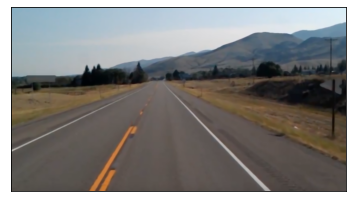

In [10]:
show_image(bruled_img)

### 2.2.2 Edge Detection

In [11]:
canny_threshold_1 = 100
canny_threshold_2 = 200
edges_img = cv2.Canny(bruled_img, canny_threshold_1, canny_threshold_2)

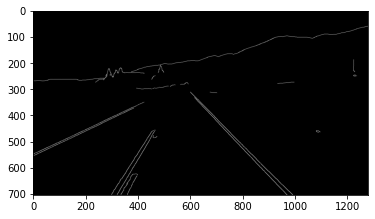

In [12]:
show_image(edges_img, True, True)

## 2.3 Region Of Interest

In [13]:
polygon = np.array([[350, 0], [350, 1000], [edges_img.shape[0], 1000], [edges_img.shape[0], 0]])
mask = polygon2mask(edges_img.shape, polygon)
roi_img = edges_img * mask

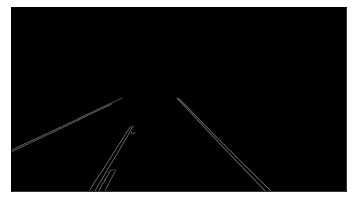

In [14]:
show_image(roi_img)

### 2.3.1 Accumulation into (ρ, θ)-space using Hough transform

In [15]:
MAX_RHO = int(math.ceil(math.sqrt(roi_img.shape[0] ** 2 + roi_img.shape[1] ** 2)))
MAX_THETA = 180 #in degree
accumelator = np.zeros((MAX_RHO * 2, MAX_THETA + 1))

In [16]:
for y in range(roi_img.shape[0]):
  for x in range(roi_img.shape[1]):
    if roi_img[y][x] == 0:
      continue
    
    for theta in range(MAX_THETA + 1):
      radian_theta = math.radians(theta) #radians
      rho = int(np.round(x * math.cos(radian_theta) + y * math.sin(radian_theta)))
      accumelator[MAX_RHO + rho, theta] += 1

### 2.3.2 Refining Coordinates and HT Post-Processing

In [17]:
def get_lines(acc, WINDOW_SIZE = 100, num_of_lines = 3):
  lines = []
  h, w = acc.shape
  MAX_RHO = h // 2

  for rho in range(0, h, WINDOW_SIZE):
    for theta in range(0, w, WINDOW_SIZE):
      max_rho = rho
      max_theta = theta

      for i in range(rho, min(rho + WINDOW_SIZE, h)):
        for j in range(theta, min(theta + WINDOW_SIZE, w)):
          if acc[max_rho][max_theta] < acc[i][j]:
            max_rho = i
            max_theta = j

      lines.append([max_rho - MAX_RHO, max_theta, acc[max_rho][max_theta]])

  lines = np.array(lines)
  lines = lines[lines[:, 2].argsort()[::-1][0:num_of_lines]] # sorting lines by intersection value, then reversing it (to be sorted in descending order) and finally taking the needed number of lines
  return lines


In [18]:
imgc = img.copy()
road_lines_img = np.zeros(img.shape).astype(np.uint8)
lines = get_lines(accumelator, WINDOW_SIZE = 100, num_of_lines = 3)

for l in lines:
    rho, theta = l[0], l[1]
    radian_theta = math.radians(theta)
    a = np.cos(radian_theta)
    b = np.sin(radian_theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + MAX_RHO * -b)
    y1 = int(y0 + MAX_RHO * a)
    x2 = int(x0 - MAX_RHO * -b)
    y2 = int(y0 - MAX_RHO * a)
    cv2.line(road_lines_img, (x1, y1), (x2, y2), (0, 255, 0), 3)
 


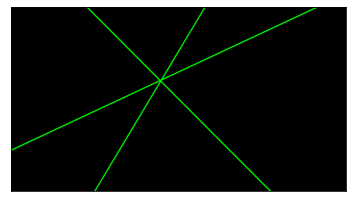

In [19]:
show_image(road_lines_img)

In [20]:
road_lines_img[0:285, 0:1200] = 0 # masking the unnecessary lines part

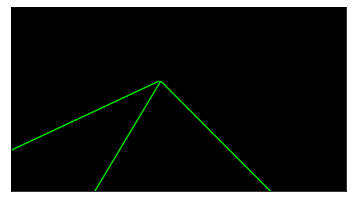

In [21]:
show_image(road_lines_img)

In [22]:
# appending road lines to the original image 
for i in range(imgc.shape[0]):
  for j in range(imgc.shape[1]):
    for k in range(imgc.shape[2]):
      if road_lines_img[i][j][k] != 0:
        imgc[i][j][k] = road_lines_img[i][j][k]

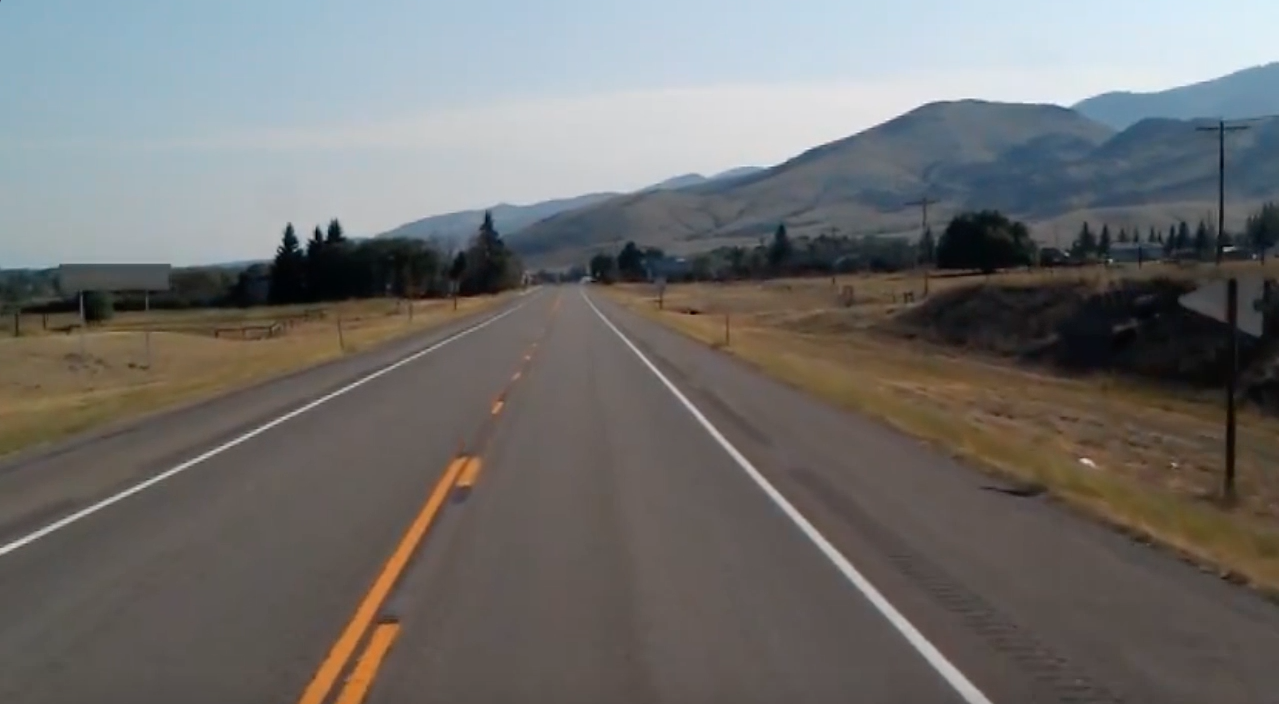

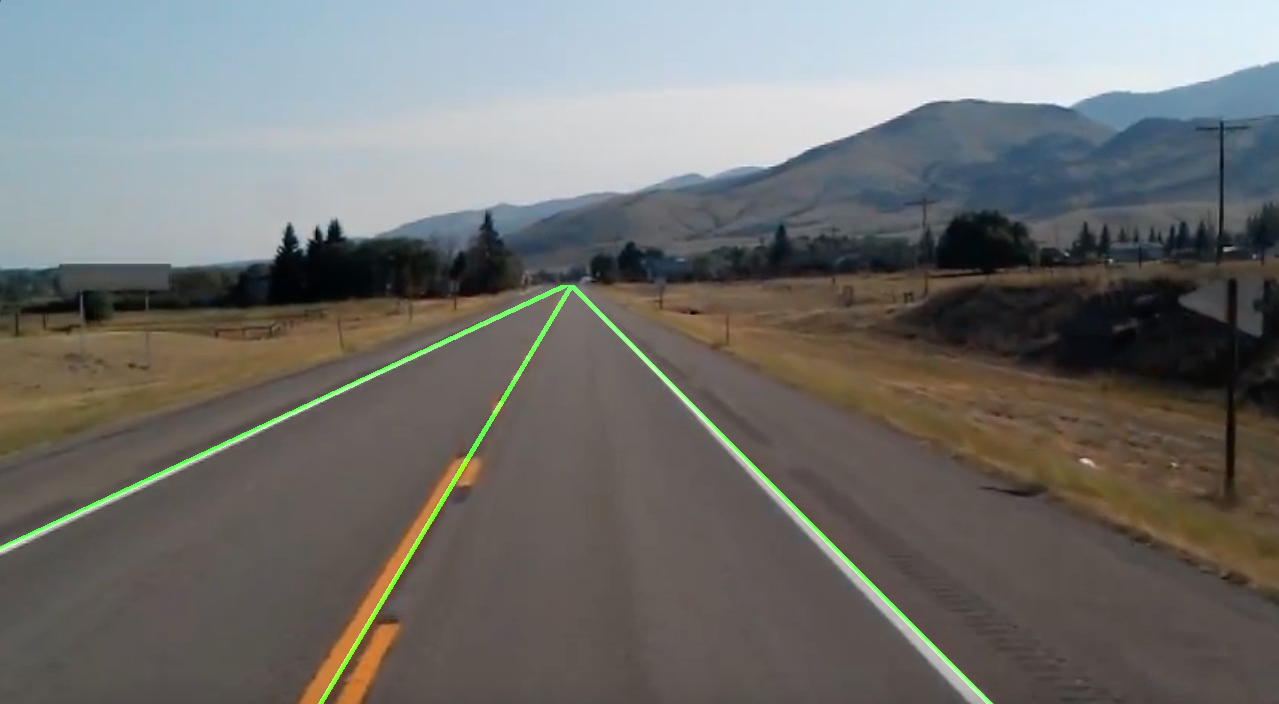

In [23]:
cv2_imshow(img)
cv2_imshow(imgc)

## Another image

In [290]:
mountain_img_path = 'm.jpeg'
img = cv2.imread(mountain_img_path)
print(img.shape)

(183, 275, 3)


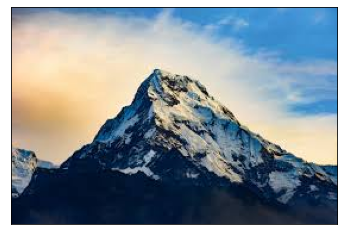

In [291]:
show_image(img)

In [407]:
KERNEL_LENGTH = 17
bruled_img = cv2.medianBlur(img, KERNEL_LENGTH)

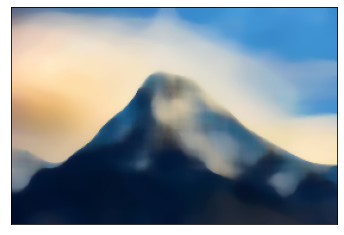

In [408]:
show_image(bruled_img)

### 2.2.2 Edge Detection

In [441]:
canny_threshold_1 = 100
canny_threshold_2 = 200
edges_img = cv2.Canny(bruled_img, canny_threshold_1, canny_threshold_2)

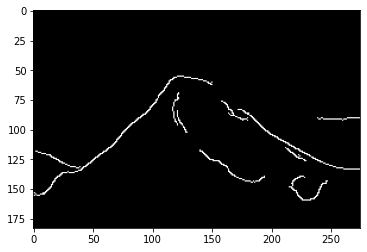

In [442]:
show_image(edges_img, True, True)

## 2.3 Region Of Interest

In [443]:
polygon = np.array([[20, 150], [175, 0], [175, 275]])
mask = polygon2mask(edges_img.shape, polygon)
roi_img = edges_img * mask

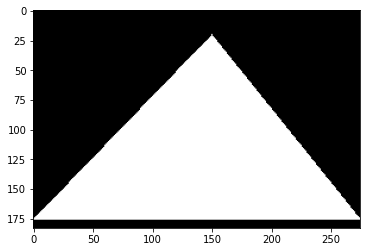

In [444]:
plt.imshow(mask, cmap='gray')

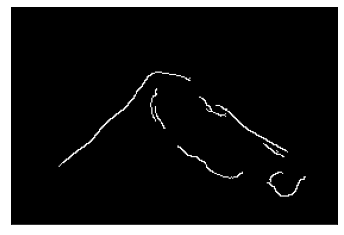

In [445]:
show_image(roi_img)

### 2.3.1 Accumulation into (ρ, θ)-space using Hough transform

In [446]:
MAX_RHO = int(math.ceil(math.sqrt(roi_img.shape[0] ** 2 + roi_img.shape[1] ** 2)))
MAX_THETA = 180 #in degree
accumelator = np.zeros((MAX_RHO * 2, MAX_THETA + 1))

In [447]:
for y in range(roi_img.shape[0]):
  for x in range(roi_img.shape[1]):
    if roi_img[y][x] == 0:
      continue
    
    for theta in range(MAX_THETA + 1):
      radian_theta = math.radians(theta) #radians
      rho = int(np.round(x * math.cos(radian_theta) + y * math.sin(radian_theta)))
      accumelator[MAX_RHO + rho, theta] += 1

### 2.3.2 Refining Coordinates and HT Post-Processing

In [448]:
imgc = img.copy()
m_lines_img = np.zeros(img.shape).astype(np.uint8)
lines = get_lines(accumelator, WINDOW_SIZE = 50, num_of_lines = 2)

for l in lines:
    rho, theta = l[0], l[1]
    radian_theta = math.radians(theta)
    a = np.cos(radian_theta)
    b = np.sin(radian_theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + MAX_RHO * -b)
    y1 = int(y0 + MAX_RHO * a)
    x2 = int(x0 - MAX_RHO * -b)
    y2 = int(y0 - MAX_RHO * a)
    cv2.line(m_lines_img, (x1, y1), (x2, y2), (0, 255, 0), 3)
 


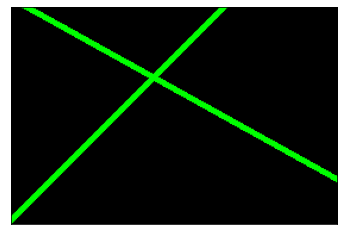

In [449]:
show_image(m_lines_img)

In [450]:
m_lines_img[0:60, 0:275] = 0 # masking the unnecessary lines part

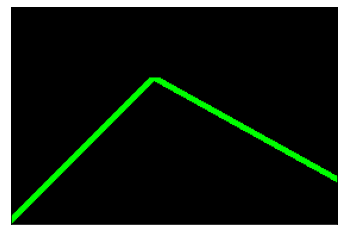

In [451]:
show_image(m_lines_img)

In [452]:
# appending road lines to the original image 
for i in range(imgc.shape[0]):
  for j in range(imgc.shape[1]):
    for k in range(imgc.shape[2]):
      if m_lines_img[i][j][k] != 0:
        imgc[i][j][k] = m_lines_img[i][j][k]

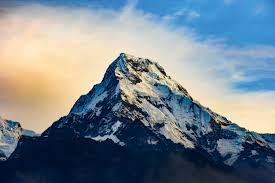

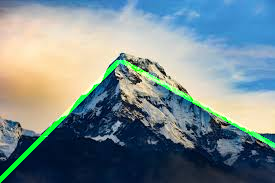

In [453]:
cv2_imshow(img)
cv2_imshow(imgc)